# Simulation analysis - Incentivizing honesty
## Saturn Aliens

### Maria Silva, August 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Upper bound formula

To derive a upper bound for the penalty, the assumption is that the expected reward obtained with cheating should be negative. 

Given the following variables:

- $r(m_i)$, the reward node $i$ receives for the service metric $m_i$.
- $m^*_i$, the service metric for node $i$, including cheating. If there is no cheating, $m^*_i = m_i$.
- $\alpha$, the true positive rate. It can be interpreted as the probability of detection, assuming the node is a cheater. We are assuming this is a constant, but it may vary with time.
- $p$, the penalty adjustment.


Then, the equation for the upper bound is as follows:

$E(r(m^*_i)) < 0 \Longleftrightarrow$

$\Longleftrightarrow (1-\alpha)\cdot r(m^*_i) + \alpha \cdot p \cdot r(m^*_i) < 0 \Longleftrightarrow$

$\Longleftrightarrow (1-\alpha) + \alpha \cdot p < 0 \Longleftrightarrow$

$\Longleftrightarrow p < \frac{\alpha-1}{\alpha}$

Interestingly, this upper bound does not depend on $r(m_i)$ nor on $m^*_i-m_i$.

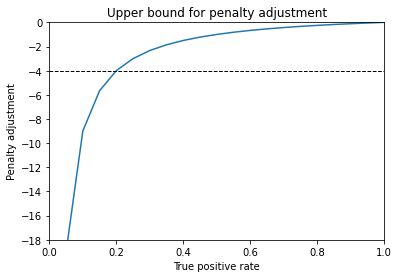

In [2]:
alpha = np.arange(0.05,1.05,0.05)
p = (alpha-1)/alpha

plt.plot(alpha,p)
plt.xlim(0,1)
plt.ylim(-18, 0)
plt.hlines(-4, xmin=0, xmax=1, linestyles='--', lw=1, colors='k')
plt.xlabel("True positive rate")
plt.ylabel("Penalty adjustment")
plt.title("Upper bound for penalty adjustment")
plt.show()

## 2. Lower bound formula

To derive a lower bound for the penalty, the assumption is that the expected reward obtained by an honest node should be higher than a certain percentage of rewards. 

Given the following variables:

- $r(m_i)$, the reward node $i$ receives for the service metric $m_i$
- $\beta$, the false positive rate. It can be interpreted as the probability of a honest node being flagged
- $\tau$, the ratio of rewards that honest nodes should receive on average
- $p$, the penalty adjustment


Then, the equation for the lower bound is as follows:

$E(r(m_i)) > \tau \cdot r(m_i) \Longleftrightarrow$

$\Longleftrightarrow (1-\beta)\cdot r(m_i) + \beta \cdot p \cdot r(m_i) > \tau \cdot r(m_i) \Longleftrightarrow$

$\Longleftrightarrow (1-\beta) + \beta \cdot p > \tau \Longleftrightarrow$

$\Longleftrightarrow p > \frac{\tau + \beta - 1}{\beta}$

Note that once again this bound does not depend on $r(m_i)$ nor on $m^*_i-m_i$.

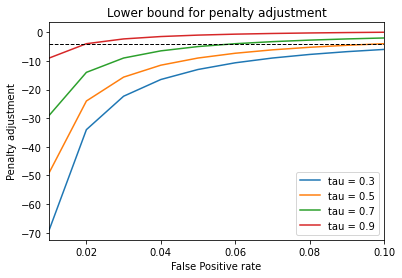

In [3]:
beta = np.arange(0.01,0.11,0.01)
tau_list = np.round(np.arange(0.3,1,0.2), 1)

for tau in tau_list:
    p = (tau + beta - 1)/beta
    plt.plot(beta, p, label=f"tau = {tau}")
plt.hlines(-4, xmin=0.01, xmax=0.10, linestyles='--', lw=1, colors='k')
plt.xlim(0.01,0.10)
plt.xlabel("False Positive rate")
plt.ylabel("Penalty adjustment")
plt.title("Lower bound for penalty adjustment")
plt.legend()
plt.show()